In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split

El objetivo de esta notebook es construir un modelo capaz de determinar dígitos escritos a mano. Para ello se usará el dataset de load_digits de scikit-learn.

In [5]:
# Empezamos importando el modelo
digits = datasets.load_digits()

# Y mostramos qué columnas tenemos en el dataset así como información para tener más claro con qué tipo de datos estamos tratando.
print(digits.keys())
print(digits.DESCR)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

Parece ser que los datos consisten en arrays 1x64 cuyos elementos representan píxeles de la imagen 8x8 en la que está representado cada número.

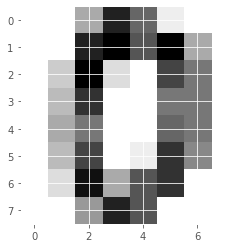

In [6]:
#Podemos ver el primer número haciendo referencia a la llave "images":
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

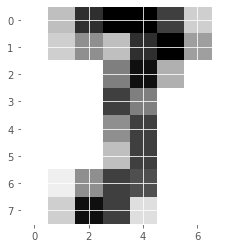

In [7]:
#Está claro que la imagen representa un 0. Probemos otro número aleatorio:
plt.imshow(digits.images[103], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [8]:
#En este caso parece difícil saber de qué número se trata. Revisemos la variable target asociada al número:
print(digits.target[103])

3


In [9]:
X = digits.data
y = digits.target
#Al disponer de pocos datos (sólo 1797) destinaremos sólo un 15% de ellos a testear el modelo, mientras que el 85% será para desarrollarlo.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1112, stratify=y)

In [10]:
neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

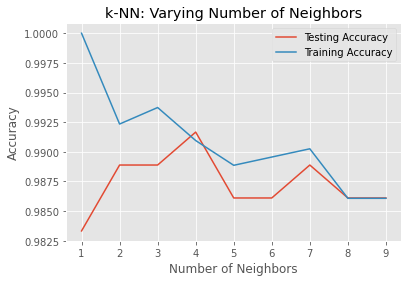

In [11]:
# Probaremos con diferentes valores de k 
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    
    #Representaremos tanto la accuracy en el modelo de test como en el de trainning
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test,y_test)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Podemos ver que con k=4 obtenemos los mejores resultados para el set de testing. Naturalmente, con k=1 obtenemos overfitting mientras que por k=9 underfitting.